In [54]:
import os
from os.path import join
import pandas as pd

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_radar(mean_vals, std_vals, metric_labels, model='HVG'):
    """
    Plots a radar chart of classification metrics with outward error bars and a reference ideal model.

    Parameters:
        mean_vals (pd.Series): Mean values for the metrics.
        std_vals (pd.Series): Standard deviation for the metrics.
        metric_labels (List[str]): List of metric names.
        title (str): Title of the plot.
    """
    num_vars = len(metric_labels)
    
    # Helper to close the radar loop
    def close_circle(values):
        return values.tolist() + values.tolist()[:1]

    # Prepare data
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    mean_values = close_circle(mean_vals)
    std_values = close_circle(std_vals)
    reference_values = close_circle(np.ones(num_vars))

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot reference line
    ax.plot(angles, reference_values, label='Reference (Ideal)', linewidth=2, color='gray', linestyle='--')

    # Plot mean values
    ax.plot(angles, mean_values, label=model, linewidth=2, color='blue')
    ax.scatter(angles, mean_values, color='blue', s=50)

    # Add one-sided error bars (outward only)
    for i in range(num_vars):
        ax.vlines(angles[i],
                  mean_vals[i],
                  min(1.0, mean_vals[i] + std_vals[i]),
                  color='blue', linewidth=1.5)

    # Labels and formatting
    title=f"Classification Metrics of {model}"
    ax.set_title(title, size=16)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_labels, fontsize=12)
    ax.set_rlabel_position(30)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color='grey', size=10)
    ax.set_ylim(0, 1.05)
    ax.yaxis.grid(True, color='lightgray')
    ax.xaxis.grid(True, color='lightgray')

    # Set outer circle color to gray
    for spine in ax.spines.values():
        spine.set_color('gray')

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function with existing data


In [56]:
dd = df[(df.model=='HVG') & (df.strategy =='avg') ]

In [57]:
means = dd.mean(numeric_only=True)
stds = dd.std(numeric_only=True)
metric_labels = means.index

In [58]:
# metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'AUPRC']

/var/tmp/ipykernel_38463/2688468124.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_38463/2688468124.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),


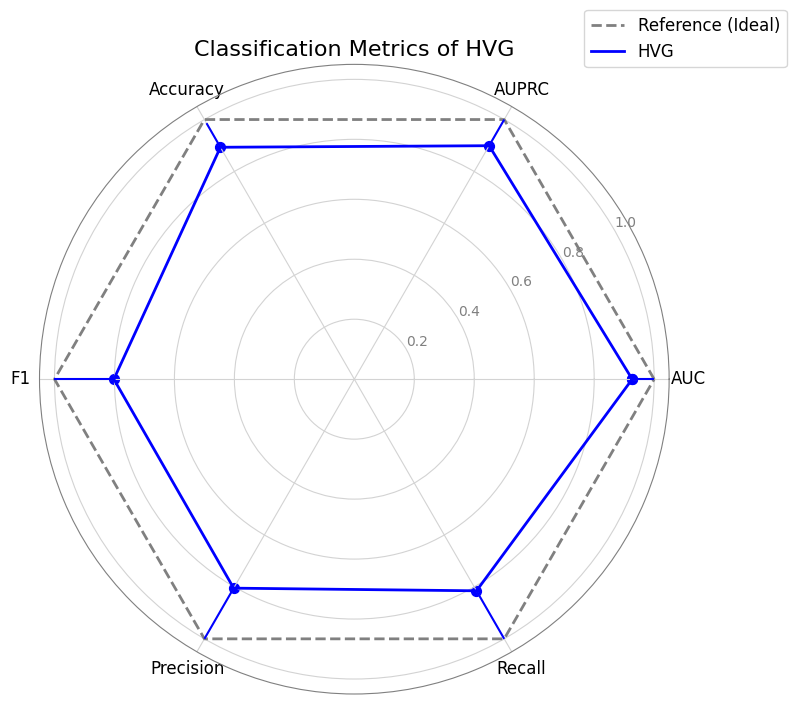

In [59]:
plot_classification_radar(means, stds, metric_labels)

In [60]:
df = pd.read_csv('./tables/Table8_classification_metrics.csv')

In [61]:
df

,model,AUC,AUPRC,Accuracy,F1,Precision,Recall,strategy,exp,exeriment
0,GF-V2,0.956,0.962,0.904,0.902,0.927,0.907,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
1,GF-V2 [cancer],0.979,0.983,0.904,0.903,0.918,0.907,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
2,GF-V2-Deep,0.989,0.992,0.903,0.901,0.921,0.905,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
3,CellPLM,0.858,0.894,0.805,0.803,0.820,0.805,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
4,GF-V1,0.934,0.941,0.836,0.834,0.849,0.838,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
...,...,...,...,...,...,...,...,...,...,...
175,scFoundation,0.825,0.833,0.653,0.644,0.723,0.725,mil,brca_full_outcome,T-cell exhaustion
176,scGPT,0.725,0.723,0.693,0.409,0.347,0.500,mil,brca_full_outcome,T-cell exhaustion
177,scGPT [cancer],0.700,0.640,0.693,0.409,0.347,0.500,mil,brca_full_outcome,T-cell exhaustion
178,SCimilarity,0.775,0.790,0.687,0.664,0.683,0.700,mil,brca_full_outcome,T-cell exhaustion


In [62]:
df.rename(columns={'accuracy': 'Accuracy', 'precision': 'Precision', 'recall': 'Recall', 'f1_score': 'F1', 'roc_auc': 'AUC', 'auprc': 'AUPRC'}, inplace=True)

In [63]:
len(df.model.unique())

12

In [64]:
df

,model,AUC,AUPRC,Accuracy,F1,Precision,Recall,strategy,exp,exeriment
0,GF-V2,0.956,0.962,0.904,0.902,0.927,0.907,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
1,GF-V2 [cancer],0.979,0.983,0.904,0.903,0.918,0.907,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
2,GF-V2-Deep,0.989,0.992,0.903,0.901,0.921,0.905,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
3,CellPLM,0.858,0.894,0.805,0.803,0.820,0.805,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
4,GF-V1,0.934,0.941,0.836,0.834,0.849,0.838,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
...,...,...,...,...,...,...,...,...,...,...
175,scFoundation,0.825,0.833,0.653,0.644,0.723,0.725,mil,brca_full_outcome,T-cell exhaustion
176,scGPT,0.725,0.723,0.693,0.409,0.347,0.500,mil,brca_full_outcome,T-cell exhaustion
177,scGPT [cancer],0.700,0.640,0.693,0.409,0.347,0.500,mil,brca_full_outcome,T-cell exhaustion
178,SCimilarity,0.775,0.790,0.687,0.664,0.683,0.700,mil,brca_full_outcome,T-cell exhaustion


In [65]:
dd = df[(df.model=='HVG') & (df.strategy =='avg') ]
dd

,model,AUC,AUPRC,Accuracy,F1,Precision,Recall,strategy,exp,exeriment
5,HVG,1.000,1.000,0.983,0.983,0.986,0.983,avg,brca_full_pre_post,Treatment Naive vs Anti PD1
17,HVG,0.817,0.640,0.796,0.443,0.398,0.500,avg,brca_full_chemo,Treatment Naive vs Neoadjuvant Chemo
29,HVG,1.000,1.000,1.000,1.000,1.000,1.000,avg,luad2,Treatment Naive vs TKI treated
41,HVG,0.967,0.973,0.860,0.859,0.875,0.867,avg,brca_full_subtype,ER+ vs TNBC
53,HVG,0.850,0.883,0.827,0.725,0.765,0.725,avg,brca_full_outcome,T-cell exhaustion


In [66]:
means = dd.mean(numeric_only=True)
means

AUC          0.9268
AUPRC        0.8992
Accuracy     0.8932
F1           0.8020
Precision    0.8048
Recall       0.8150
dtype: float64

In [67]:
means.index

Index(['AUC', 'AUPRC', 'Accuracy', 'F1', 'Precision', 'Recall'], dtype='object')

In [76]:
models = [
'HVG',
'PCA',
'scVI', 
'GF-V1',
'GF-V2',
'GF-V2 [cancer]',
'GF-V2-Deep',
'CellPLM',
'scFoundation',
'SCimilarity',
'scGPT',
'scGPT [cancer]'

]

models

['HVG',
 'PCA',
 'scVI',
 'GF-V1',
 'GF-V2',
 'GF-V2 [cancer]',
 'GF-V2-Deep',
 'CellPLM',
 'scFoundation',
 'SCimilarity',
 'scGPT',
 'scGPT [cancer]']

In [77]:
def plot_classification_radar_subplot_with_values_below(ax, mean_vals, std_vals, metric_labels, title="", color='blue'):
    """
    Subplot version of the radar chart with annotated mean values shown below the metric names.
    """
    num_vars = len(metric_labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    def close_circle(values):
        return values.tolist() + values.tolist()[:1]

    mean_values = close_circle(mean_vals)
    std_values = close_circle(std_vals)
    # reference_values = close_circle(np.ones(num_vars))


    reference_values = close_circle(np.clip(mean_vals + std_vals, 0, 1))  # clipped to valid range [0, 1]

    
    # Plot reference line
    ax.plot(angles, reference_values, linewidth=1.5, color='gray', linestyle='--', label='Reference (Ideal)')
    # Plot mean values
    ax.plot(angles, mean_values, linewidth=1.5, color=color, label='Mean')
    ax.scatter(angles, mean_values, color=color, s=20)

    # Add one-sided error bars
    for i in range(num_vars):
        ax.vlines(angles[i],
                  mean_vals[i],
                  min(1.0, mean_vals[i] + std_vals[i]),
                  color=color, linewidth=1)

    # Set axis labels and annotate values under them
    ax.set_xticks(angles[:-1])
    xtick_labels = [
        f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
    ]
    ax.set_xticklabels(xtick_labels, fontsize=8)

    ax.set_yticks([0.2, 0.6, 1.0])
    ax.set_yticklabels(["0.2", "0.6", "1.0"], color='grey', size=7)
    ax.set_ylim(0, 1.05)
    ax.set_rlabel_position(0)
    ax.grid(color='lightgray')

    for spine in ax.spines.values():
        spine.set_color('gray')

    ax.set_title(title, fontsize=10)

In [78]:
# models= list(df.model.unique())

/var/tmp/ipykernel_38463/3689162703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_38463/3689162703.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),
/var/tmp/ipykernel_38463/3689162703.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
/var/tmp/ipykernel_38463/

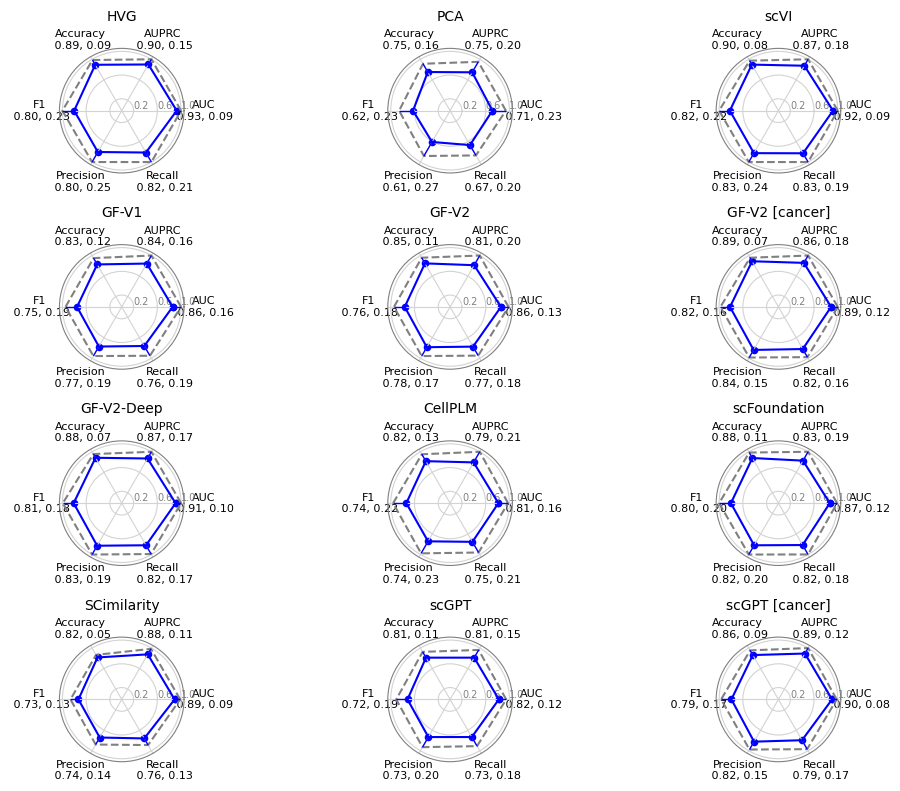

In [80]:
fig, axes = plt.subplots(4, 3, figsize=(10,8 ), subplot_kw=dict(polar=True))
# fig.subplots_adjust(hspace=0.2, wspace=0.1)

for i, (ax, m) in enumerate(zip(axes.flat, models)):
    dd = df[(df.model==m) & (df.strategy =='avg') ]
    means = dd.mean(numeric_only=True)
    stds = dd.std(numeric_only=True)
    metric_labels = means.index
    plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='blue')

plt.tight_layout()
plt.savefig('./plots/fig4_avg_rader.png', dpi = 300)

plt.show()

In [72]:
# fig, axes = plt.subplots(4, 3, figsize=(10,8 ), subplot_kw=dict(polar=True))
# fig.subplots_adjust(hspace=0.2, wspace=0.2)

# for i, (ax, m) in enumerate(zip(axes.flat, models)):
#     dd = df[(df.model==m) & (df.strategy =='avg') ]
#     means = dd.mean(numeric_only=True)
#     stds = dd.std(numeric_only=True)
#     plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='blue')

# plt.tight_layout()
# plt.savefig('avg_rader.png', dpi = 100)

# plt.show()

/var/tmp/ipykernel_38463/3689162703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_38463/3689162703.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),
/var/tmp/ipykernel_38463/3689162703.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
/var/tmp/ipykernel_38463/

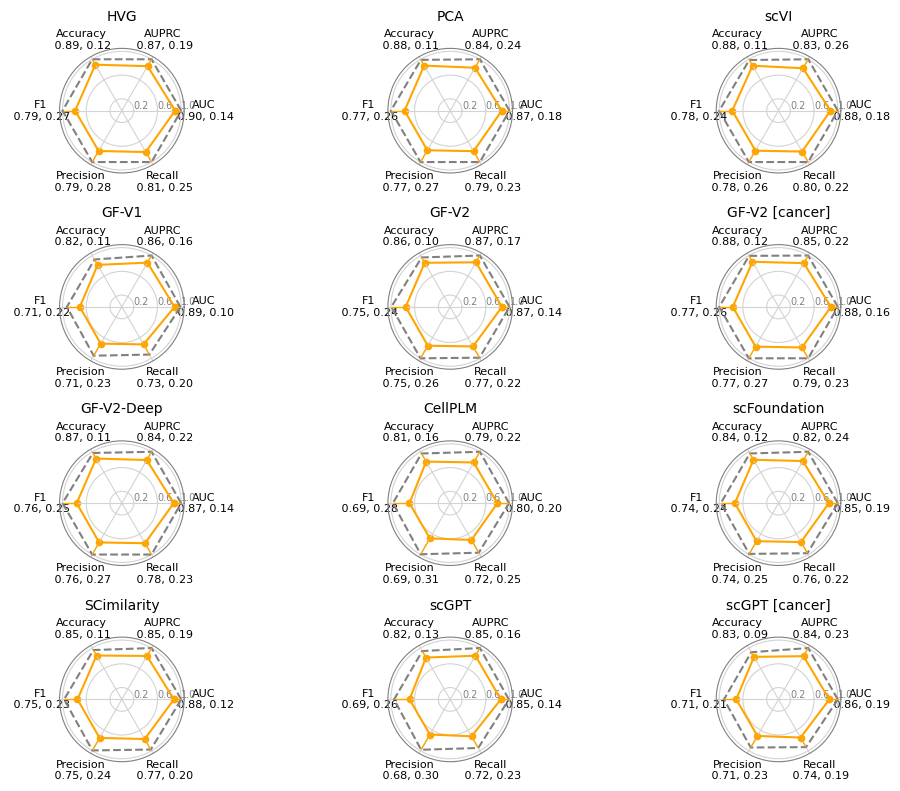

In [81]:
fig, axes = plt.subplots(4, 3, figsize=(10,8 ), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, (ax, m) in enumerate(zip(axes.flat, models)):
    dd = df[(df.model==m) & (df.strategy =='vote') ]
    means = dd.mean(numeric_only=True)
    stds = dd.std(numeric_only=True)
    metric_labels = means.index
    plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='orange')

plt.tight_layout()
plt.savefig('./plots/fig4_vote_rader.png', dpi = 100)

plt.show()

/var/tmp/ipykernel_38463/3689162703.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_vals[i],
/var/tmp/ipykernel_38463/3689162703.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min(1.0, mean_vals[i] + std_vals[i]),
/var/tmp/ipykernel_38463/3689162703.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{label}\n {mean_vals[i]:.2f}, {std_vals[i]:.2f}" for i, label in enumerate(metric_labels)
/var/tmp/ipykernel_38463/

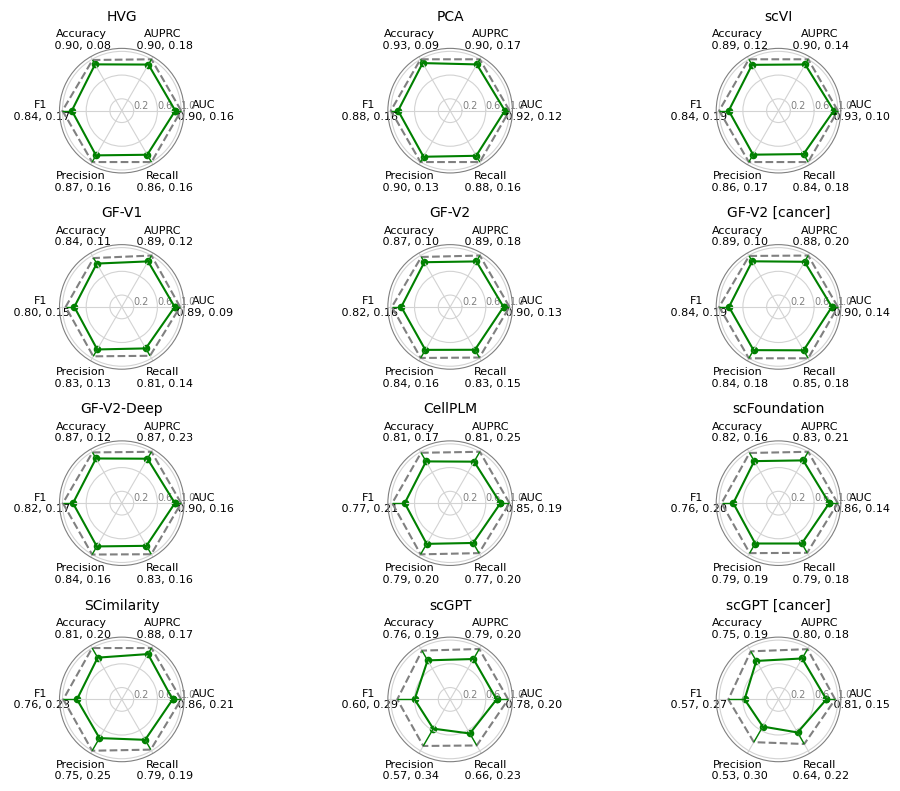

In [83]:
fig, axes = plt.subplots(4, 3, figsize=(10,8 ), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i, (ax, m) in enumerate(zip(axes.flat, models)):
    dd = df[(df.model==m) & (df.strategy =='mil') ]
    means = dd.mean(numeric_only=True)
    stds = dd.std(numeric_only=True)
    metric_labels = means.index
    plot_classification_radar_subplot_with_values_below(ax, means, stds, metric_labels, title=m, color='green')
# plt.title('Multi-instance Learning (MIL)')
plt.tight_layout()
plt.savefig('./plots/fig4_mil_rader.png', dpi = 100)
plt.show()